In [72]:
import os

import pandas as pd
from pandas import Series,DataFrame

# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import xgboost as xgb

In [73]:
# get expedia & test csv files as a DataFrame
expedia_df = pd.read_csv('train.csv')
test_df    = pd.read_csv('test.csv')

# preview the data
expedia_df.head()

,Unnamed: 0,date_time,site_name,posa_continent,user_location_country,user_location_region,user_location_city,orig_destination_distance,user_id,is_mobile,...,srch_children_cnt,srch_rm_cnt,srch_destination_id,srch_destination_type_id,is_booking,cnt,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,0,2014-08-11 07:46:59,2,3,66,348,48862,2234.2641,12,0,...,0,1,8250,1,0,3,2,50,628,1
1,1,2014-08-11 08:22:12,2,3,66,348,48862,2234.2641,12,0,...,0,1,8250,1,1,1,2,50,628,1
2,2,2014-08-11 08:24:33,2,3,66,348,48862,2234.2641,12,0,...,0,1,8250,1,0,1,2,50,628,1
3,3,2014-08-09 18:05:16,2,3,66,442,35390,913.1932,93,0,...,0,1,14984,1,0,1,2,50,1457,80
4,4,2014-08-09 18:08:18,2,3,66,442,35390,913.6259,93,0,...,0,1,14984,1,0,1,2,50,1457,21


In [74]:
expedia_df.info()
print("----------------------------")
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 10000 non-null  int64  
 1   date_time                  10000 non-null  object 
 2   site_name                  10000 non-null  int64  
 3   posa_continent             10000 non-null  int64  
 4   user_location_country      10000 non-null  int64  
 5   user_location_region       10000 non-null  int64  
 6   user_location_city         10000 non-null  int64  
 7   orig_destination_distance  6271 non-null   float64
 8   user_id                    10000 non-null  int64  
 9   is_mobile                  10000 non-null  int64  
 10  is_package                 10000 non-null  int64  
 11  channel                    10000 non-null  int64  
 12  srch_ci                    9993 non-null   object 
 13  srch_co                    9993 non-null   obje

In [75]:
# drop unnecessary columns
expedia_df = expedia_df.drop(['date_time','site_name', 'user_location_region', 'user_location_city', 'orig_destination_distance', 
                              'user_id', 'srch_co', 'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt', 'cnt'], axis=1)
test_df    = test_df.drop(['date_time','site_name', 'user_location_region', 'user_location_city', 'orig_destination_distance', 
                              'user_id', 'srch_co', 'srch_adults_cnt', 'srch_children_cnt', 'srch_rm_cnt'], axis=1)

### Check data outlook

In [76]:
expedia_df.head()

,Unnamed: 0,posa_continent,user_location_country,is_mobile,is_package,channel,srch_ci,srch_destination_id,srch_destination_type_id,is_booking,hotel_continent,hotel_country,hotel_market,hotel_cluster
0,0,3,66,0,1,9,2014-08-27,8250,1,0,2,50,628,1
1,1,3,66,0,1,9,2014-08-29,8250,1,1,2,50,628,1
2,2,3,66,0,0,9,2014-08-29,8250,1,0,2,50,628,1
3,3,3,66,0,0,3,2014-11-23,14984,1,0,2,50,1457,80
4,4,3,66,0,0,3,2014-11-23,14984,1,0,2,50,1457,21


In [77]:
expedia_df[expedia_df['is_booking']==1]

,Unnamed: 0,posa_continent,user_location_country,is_mobile,is_package,channel,srch_ci,srch_destination_id,srch_destination_type_id,is_booking,hotel_continent,hotel_country,hotel_market,hotel_cluster
1,1,3,66,0,1,9,2014-08-29,8250,1,1,2,50,628,1
20,20,3,66,0,1,4,2014-04-18,8291,1,1,2,50,191,2
27,27,4,195,0,1,9,2013-09-06,1385,1,1,0,185,185,58
72,72,4,195,0,0,9,2015-06-26,8803,1,1,3,151,69,36
79,79,3,66,0,1,1,2014-02-22,12009,1,1,2,50,680,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9946,9946,3,66,0,0,0,2014-04-20,12277,6,1,2,50,191,28
9953,9953,3,66,0,0,0,2014-05-16,12279,6,1,2,50,191,28
9964,9964,3,66,0,0,0,2014-08-13,12576,5,1,2,50,676,33
9974,9974,3,66,0,0,0,2014-08-28,11994,6,1,2,50,694,72


In [78]:
set(expedia_df['hotel_continent'].tolist())

{0, 2, 3, 4, 5, 6}

In [79]:
pd.to_datetime(expedia_df['srch_ci'].tolist())

DatetimeIndex(['2014-08-27', '2014-08-29', '2014-08-29', '2014-11-23',
               '2014-11-23', '2014-11-23', '2014-08-01', '2014-08-01',
               '2014-08-01', '2014-08-01',
               ...
               '2013-05-28', '2013-05-29', '2014-06-09', '2014-06-09',
               '2014-08-28', '2014-08-28', '2014-08-28', '2014-08-29',
               '2014-08-29', '2014-08-28'],
              dtype='datetime64[ns]', length=10000, freq=None)

In [80]:
min(pd.to_datetime(expedia_df['srch_ci'].tolist()))

Timestamp('2013-01-08 00:00:00')

In [81]:
max(pd.to_datetime(expedia_df['srch_ci'].tolist()))

Timestamp('2015-12-28 00:00:00')

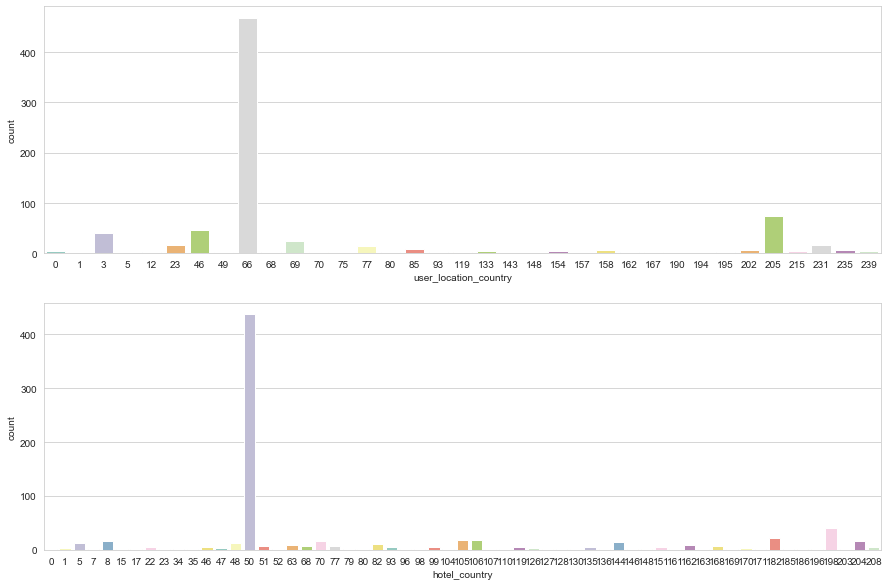

In [82]:
# Plot 

fig, (axis1,axis2) = plt.subplots(2,1,figsize=(15,10))

bookings_df = expedia_df[expedia_df["is_booking"] == 1]

# What are the most countries the customer travel from?
sns.countplot('user_location_country',data=bookings_df.sort_values(by=['user_location_country']),ax=axis1,palette="Set3")

# What are the most countries the customer travel to?
sns.countplot('hotel_country',data=bookings_df.sort_values(by=['hotel_country']),ax=axis2,palette="Set3")

### Where do most of the customers from a country 66 travel?

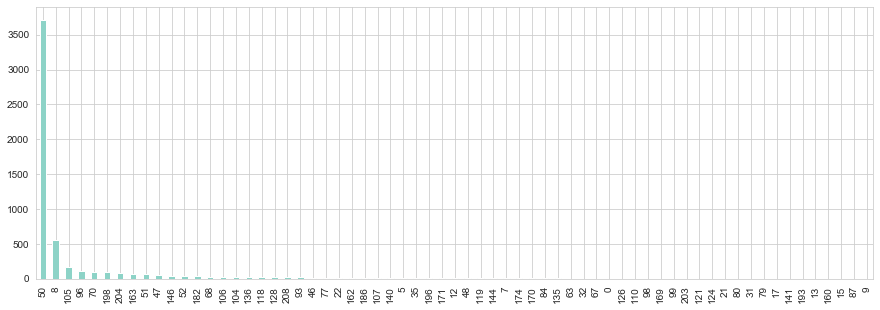

In [83]:
user_country_id = 66

fig, (axis1) = plt.subplots(1,1,figsize=(15,10))

country_customers = expedia_df[expedia_df["user_location_country"] == user_country_id]
country_customers["hotel_country"].value_counts().plot(kind='bar',colormap="Set3",figsize=(15,5))

### Frequency for each hotel_clusters

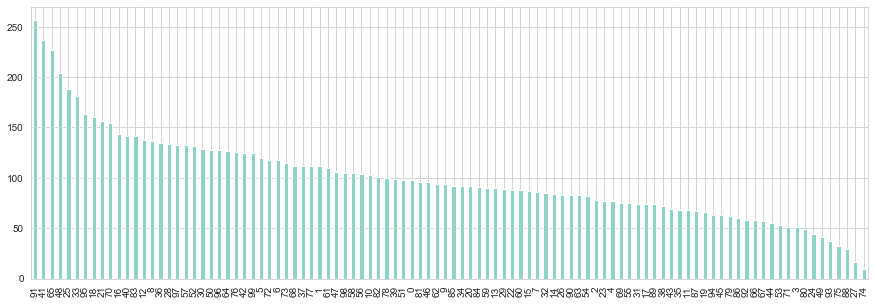

In [84]:
expedia_df["hotel_cluster"].value_counts().plot(kind='bar',colormap="Set3",figsize=(15,5))

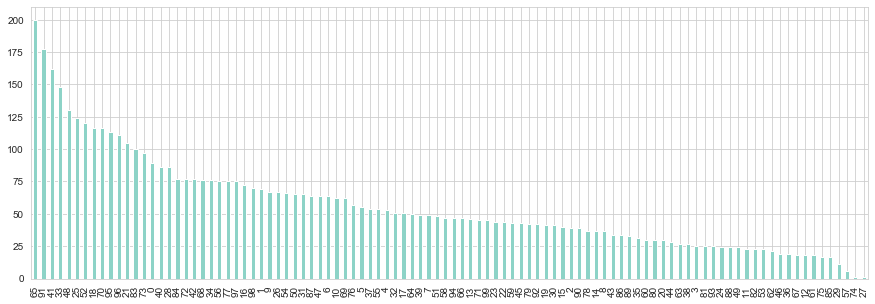

In [85]:
# most frequent hotel clusters booked by customers from a country 66

user_country_id = 66

fig, (axis1) = plt.subplots(1,1,figsize=(15,10))

customer_clusters = expedia_df[expedia_df["user_location_country"] == user_country_id]["hotel_cluster"]
customer_clusters.value_counts().plot(kind='bar',colormap="Set3",figsize=(15,5))

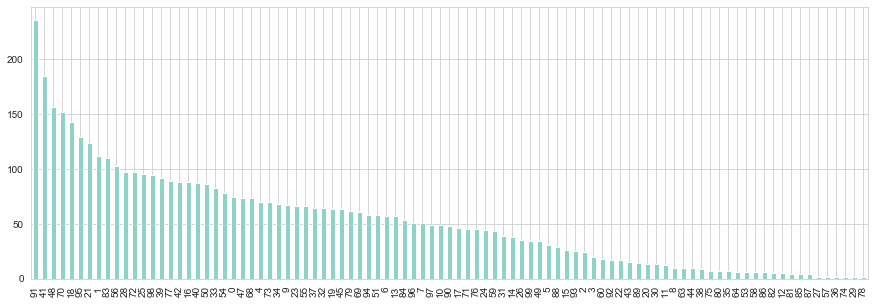

In [86]:
# most frequent hotel clusters in a country 50

country_id = 50

fig, (axis1) = plt.subplots(1,1,figsize=(15,10))

country_clusters = expedia_df[expedia_df["hotel_country"] == country_id]["hotel_cluster"]
country_clusters.value_counts().plot(kind='bar',colormap="Set3",figsize=(15,5))

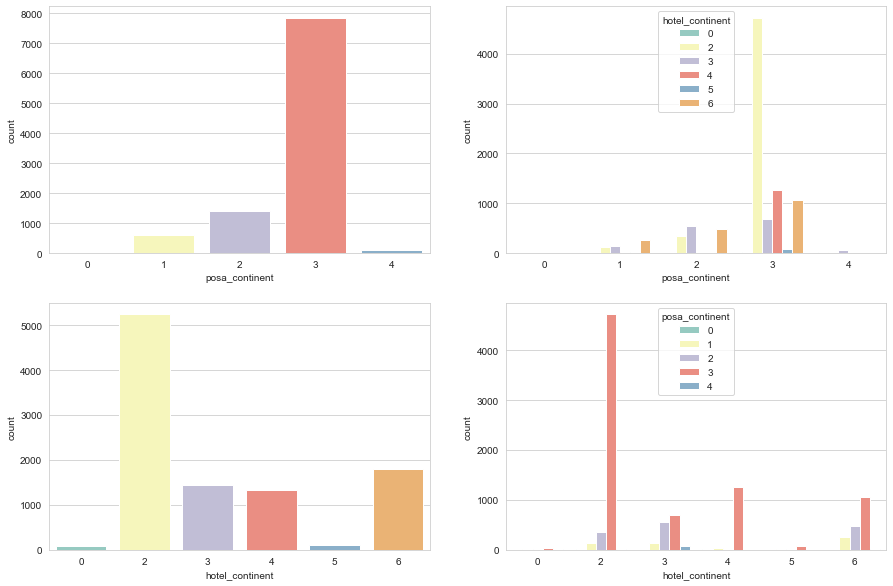

In [87]:
# Plot post_continent & hotel_continent

fig, ((axis1,axis2),(axis3,axis4)) = plt.subplots(2,2,figsize=(15,10))

# Plot frequency for each posa_continent
sns.countplot('posa_continent', data=expedia_df,order=[0,1,2,3,4],palette="Set3",ax=axis1)

# Plot frequency for each posa_continent decomposed by hotel_continent
sns.countplot('posa_continent', hue='hotel_continent',data=expedia_df,order=[0,1,2,3,4],palette="Set3",ax=axis2)

# Plot frequency for each hotel_continent
sns.countplot('hotel_continent', data=expedia_df,order=[0,2,3,4,5,6],palette="Set3",ax=axis3)

# Plot frequency for each hotel_continent decomposed by posa_continent
sns.countplot('hotel_continent', hue='posa_continent', data=expedia_df, order=[0,2,3,4,5,6],palette="Set3",ax=axis4)

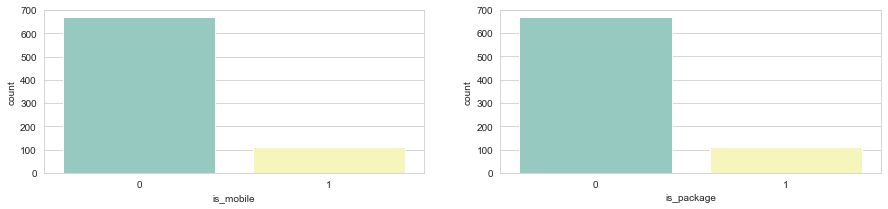

In [88]:
# check frequency customer from mobile & with package with flight

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,3))

# What's the frequency of bookings through mobile?
sns.countplot(x='is_mobile',data=bookings_df, order=[0,1], palette="Set3", ax=axis1)

# What's the frequency of bookings with package?
sns.countplot(x='is_package',data=bookings_df, order=[0,1], palette="Set3", ax=axis2)

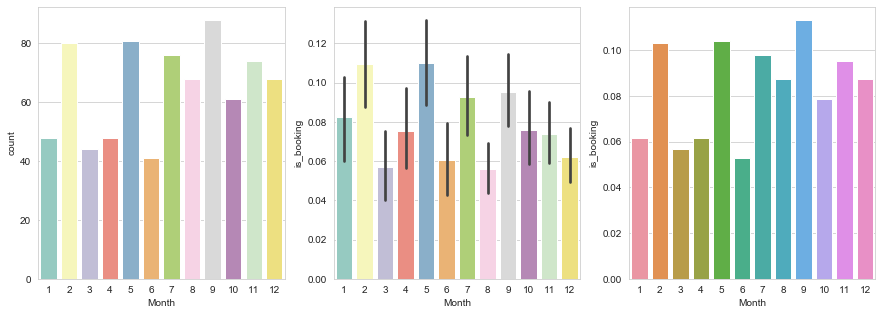

In [89]:
# visualization check in date, Month , Week

expedia_df['Year']   = expedia_df['srch_ci'].apply(lambda x: int(str(x)[:4]) if x == x else np.nan)
expedia_df['Month']  = expedia_df['srch_ci'].apply(lambda x: int(str(x)[5:7]) if x == x else np.nan)
expedia_df['Week']   = expedia_df['srch_ci'].apply(lambda x: int(str(x)[8:10]) if x == x else np.nan)

fig, (axis1,axis2,axis3) = plt.subplots(1,3,sharex=True,figsize=(15,5))

# Plot How many bookings in each month
sns.countplot('Month',data=expedia_df[expedia_df["is_booking"] == 1],order=list(range(1,13)),palette="Set3",ax=axis1)

# Plot The percentage of bookings of each month(sum of month bookings / count of bookings(=1 OR =0) of a month)
sns.barplot('Month',"is_booking",data=expedia_df, order=list(range(1,13)), palette="Set3",ax=axis2)

# Plot The percentage of bookings of each month compared to all bookings(sum of month bookings / count of bookings(=1) of all months)
month_sum = expedia_df[['Month', 'is_booking']].groupby(['Month'],as_index=False).sum()
month_sum['is_booking'] = month_sum['is_booking'] / len(expedia_df[expedia_df['is_booking'] == 1])

sns.barplot(x='Month', y='is_booking', order=list(range(1,13)), data=month_sum,ax=axis3) 

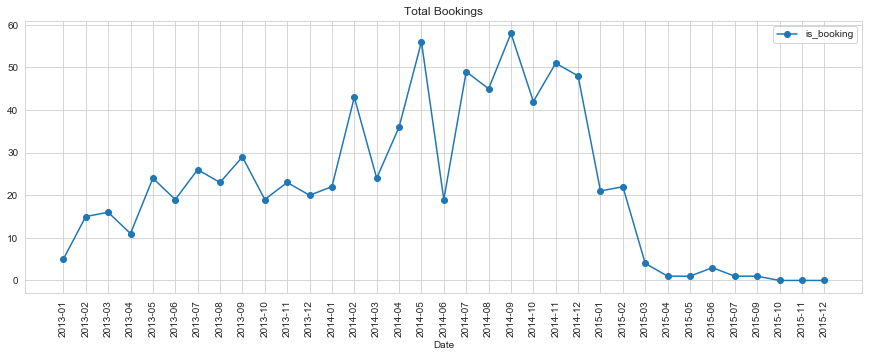

In [90]:
# visualization booking date

expedia_df['Date']  = expedia_df['srch_ci'].apply(lambda x: (str(x)[:7]) if x == x else np.nan)

# Plot number of bookings over Date
date_bookings  = expedia_df.groupby('Date')["is_booking"].sum()
ax1 = date_bookings.plot(legend=True,marker='o',title="Total Bookings", figsize=(15,5)) 
ax1.set_xticks(range(len(date_bookings)))
xlabels = ax1.set_xticklabels(date_bookings.index.tolist(), rotation=90)

## Define training set and test set

In [91]:
train_df = pd.read_csv('train.csv', usecols=['is_booking', 'srch_destination_id', 'hotel_cluster'])
test_df  = test_df[['id', 'srch_destination_id']]

In [92]:
# sum is the sum of transaction that is booking
# count is the total number of transaction it show up

train_df = train_df.groupby(['srch_destination_id','hotel_cluster'])['is_booking'].agg(['sum','count'])
train_df

sum  count
srch_destination_id hotel_cluster            
11                  94               1      2
16                  7                1      2
19                  20               0      1
                    30               0      1
                    40               0      4
...                                ...    ...
64627               48               0      1
                    94               0      1
65035               10               1      7
                    35               0      1
                    36               0      1

[4363 rows x 2 columns]

In [93]:
# now we exclude itself from the count

train_df['count'] = train_df['count'] - train_df['sum']
train_df

sum  count
srch_destination_id hotel_cluster            
11                  94               1      1
16                  7                1      1
19                  20               0      1
                    30               0      1
                    40               0      4
...                                ...    ...
64627               48               0      1
                    94               0      1
65035               10               1      6
                    35               0      1
                    36               0      1

[4363 rows x 2 columns]

In [94]:
# For each destination id & hotel cluster, 
# the relevance will be the number of bookings made + number of clicks(no-bookings) * 0.2
# meaning for every 10 clicks, they will be counted as 2 booking

train_df.rename(columns={'sum': 'sum_bookings', 'count': 'clicks'}, inplace=True)

train_df['relevance'] = train_df['sum_bookings'] + (train_df['clicks'] * 0.2)

In [95]:
train_df

sum_bookings  clicks  relevance
srch_destination_id hotel_cluster                                 
11                  94                        1       1        1.2
16                  7                         1       1        1.2
19                  20                        0       1        0.2
                    30                        0       1        0.2
                    40                        0       4        0.8
...                                         ...     ...        ...
64627               48                        0       1        0.2
                    94                        0       1        0.2
65035               10                        1       6        2.2
                    35                        0       1        0.2
                    36                        0       1        0.2

[4363 rows x 3 columns]

## Model setup

In [96]:
def get_top_clusters(group):
    indexes      = group.relevance.nlargest(5).index
    top_clusters = group.hotel_cluster[indexes].values
    if(len(top_clusters) < 5):
        top_clusters = (list(top_clusters) + list(ferq_clusters.index))[:5]
    return np.array_str(np.array(top_clusters))[1:-1]

train_df      = train_df.reset_index()
ferq_clusters = train_df['hotel_cluster'].value_counts()[:5]
top_clusters  = train_df.groupby(['srch_destination_id']).apply(get_top_clusters)

In [97]:
top_clusters

srch_destination_id
11       94 91 48 41 30
16        7 91 48 41 30
19       40 20 30 61 91
56       57 91 48 41 30
66       50 91 48 41 30
              ...      
63067    17 91 48 41 30
63687    90 73 91 48 41
64591    62 80 91 48 41
64627    34 16 18 48 94
65035    10 35 36 91 48
Length: 1144, dtype: object

In [98]:
# Create top_clusters_df

top_clusters_df = pd.DataFrame(top_clusters).rename(columns={0: 'hotel_cluster'})
top_clusters_df.head()

,hotel_cluster
srch_destination_id,
11,94 91 48 41 30
16,7 91 48 41 30
19,40 20 30 61 91
56,57 91 48 41 30
66,50 91 48 41 30


In [99]:
# Merge test dataset with top_clusters_df

# For every destination id in test_df, merge it with the corresponding id in top_clusters_df 
test_df = pd.merge(test_df, top_clusters_df, how='left',left_on='srch_destination_id', right_index=True)

test_df

,id,srch_destination_id,hotel_cluster
0,0,12243,NaN
1,1,14474,NaN
2,2,11353,21 91 9 13 28
3,3,8250,1 45 79 54 24
4,4,11812,47 16 91 48 41
...,...,...,...
9995,9995,8259,61 81 11 29 30
9996,9996,28363,NaN
9997,9997,12798,NaN
9998,9998,25096,NaN


In [100]:
# Fill NaN values with most frequent clusters
test_df.hotel_cluster.fillna(np.array_str(ferq_clusters.index)[1:-1],inplace=True)

Y_pred = test_df["hotel_cluster"]

In [101]:
# Create submission

submission = pd.DataFrame()
submission["id"]            = test_df["id"]
submission["hotel_cluster"] = Y_pred

submission.to_csv('expedia.csv', index=False)

In [102]:
submission.head()

,id,hotel_cluster
0,0,91 48 41 30 42
1,1,91 48 41 30 42
2,2,21 91 9 13 28
3,3,1 45 79 54 24
4,4,47 16 91 48 41
